In [1]:
import os
from os.path import join as jp

import numpy as np
import pandas as pd
import nibabel as nib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from damri.dataset.cc359 import CC359, Rescale3D

from dpipe.dataset.wrappers import Proxy
from dpipe.im.shape_ops import zoom

In [3]:
data_path = '/nmnt/x3-hdd/data/cc359'
dataset = CC359(data_path, ('MRI',))

df = dataset.df
df.head()

,MRI,brain_mask,fold,tomograph_model,tesla_value,x,y,z
id,,,,,,,,
CC0001,images/CC0001_philips_15_55_M.nii.gz,masks/CC0001_philips_15_55_M_ss.nii.gz,4,philips,15,0.999998,1.000000,1.000000
CC0002,images/CC0002_philips_15_56_M.nii.gz,masks/CC0002_philips_15_56_M_ss.nii.gz,4,philips,15,1.000000,0.888889,0.888889
CC0003,images/CC0003_philips_15_63_F.nii.gz,masks/CC0003_philips_15_63_F_ss.nii.gz,4,philips,15,1.000005,0.888889,0.888889
CC0004,images/CC0004_philips_15_67_M.nii.gz,masks/CC0004_philips_15_67_M_ss.nii.gz,4,philips,15,1.000010,0.888889,0.888889
CC0005,images/CC0005_philips_15_62_M.nii.gz,masks/CC0005_philips_15_62_M_ss.nii.gz,4,philips,15,1.000010,0.888889,0.888889


In [7]:
pixdims = []

for _id in tqdm(df.index):
    img = nib.load(jp(data_path, df.loc[_id]['MRI']))
    pixdims.append(img.header['pixdim'][1:4])

In [9]:
pixdims = np.array(pixdims)

In [13]:
df['x'] = pixdims.T[0]
df['y'] = pixdims.T[1]
df['z'] = pixdims.T[2]

In [14]:
df.to_csv(jp(data_path, 'meta.csv'), index_label='id')

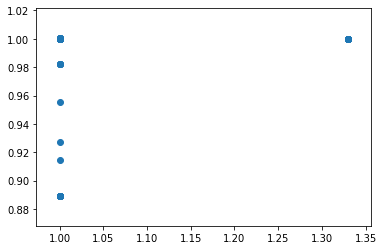

In [11]:
plt.scatter(pixdims.T[0], pixdims.T[1])
plt.show()

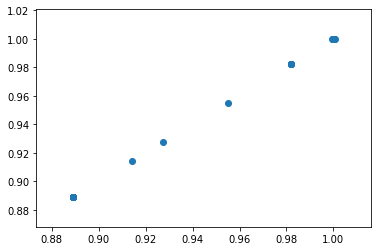

In [12]:
plt.scatter(pixdims.T[1], pixdims.T[2])
plt.show()